<a href="https://colab.research.google.com/github/adriendod/Color_Classification/blob/master/Color_Classification_CNN_Transfer_94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


!nvidia-smi

Using TensorFlow backend.


Mon Jun 17 14:55:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |   7243MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%%capture
!unzip "/content/gdrive/My Drive/Data Science/Projets/Car_color_classification/data.zip" -d "/content"

In [0]:
# model config
img_rows , img_cols = 224,224
num_classes = 10
batch_size = 32
nb_epoch = 6
data_directory = "/content/data"
class_list = ['black', 'blue', 'cyan', 'green', 'grey_light', 'grey_other', 'notACar', 'red', 'white', 'yellow']


In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)) #include_top=False excludes final FC layer

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 21,140,042
Trainable params: 21,140,042
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

base_model.trainable = False

print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)


training_set = train_datagen.flow_from_directory(
            data_directory,
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            subset = 'training')

test_set = train_datagen.flow_from_directory(
            data_directory,
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            subset = 'validation')

Found 34804 images belonging to 10 classes.
Found 8695 images belonging to 10 classes.


In [0]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=34804/batch_size,
        epochs=nb_epoch,
        validation_data=test_set,
        validation_steps=8695/batch_size)

model.save('/content/gdrive/My Drive/Data Science/Projets/Car_color_classification/color_model_mobilenet.h5')
with open('/content/gdrive/My Drive/Data Science/Projets/Car_color_classification/history.json', 'w') as f:
    json.dump(history.history, f)


Epoch 1/6
1088/1087 [==============================] - 694s 638ms/step - loss: 1.1928 - categorical_accuracy: 0.6074 - val_loss: 0.9438 - val_categorical_accuracy: 0.7019
Epoch 2/6
1088/1087 [==============================] - 683s 628ms/step - loss: 0.8596 - categorical_accuracy: 0.7174 - val_loss: 0.8158 - val_categorical_accuracy: 0.7335
Epoch 3/6
1088/1087 [==============================] - 679s 624ms/step - loss: 0.7706 - categorical_accuracy: 0.7462 - val_loss: 0.7521 - val_categorical_accuracy: 0.7496
Epoch 4/6
1088/1087 [==============================] - 675s 620ms/step - loss: 0.7233 - categorical_accuracy: 0.7590 - val_loss: 0.7746 - val_categorical_accuracy: 0.7388
Epoch 5/6
1088/1087 [==============================] - 678s 623ms/step - loss: 0.6921 - categorical_accuracy: 0.7696 - val_loss: 0.6926 - val_categorical_accuracy: 0.7662
Epoch 6/6
1088/1087 [==============================] - 687s 631ms/step - loss: 0.6736 - categorical_accuracy: 0.7745 - val_loss: 0.7564 - val_cat

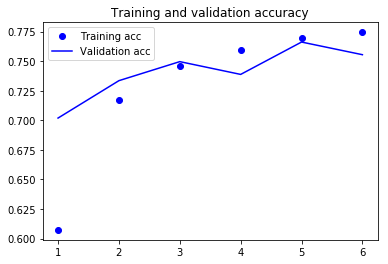

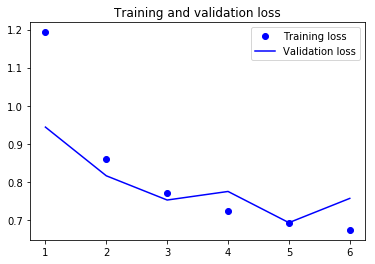

In [0]:
#plotting results
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
callbacks_list = [ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose = 1, patience=2),
                 ModelCheckpoint(filepath='/content/gdrive/My Drive/Data Science/Projets/Car_color_classification/temp_models/my_model.h5', monitor='val_loss', verbose=1, save_best_only=True)]

In [0]:


model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [0]:
history = model.fit_generator(
              training_set,
              steps_per_epoch=34804/batch_size,
              epochs=10,
              validation_data=test_set,
              validation_steps=8695/batch_size,
              callbacks=callbacks_list)

Epoch 1/10
1088/1087 [==============================] - 810s 744ms/step - loss: 0.4907 - categorical_accuracy: 0.8389 - val_loss: 0.3352 - val_categorical_accuracy: 0.8867

Epoch 00001: val_loss improved from inf to 0.33519, saving model to my_model.h5
Epoch 2/10
1088/1087 [==============================] - 785s 721ms/step - loss: 0.3043 - categorical_accuracy: 0.9005 - val_loss: 0.2983 - val_categorical_accuracy: 0.9016

Epoch 00002: val_loss improved from 0.33519 to 0.29830, saving model to my_model.h5
Epoch 3/10
1088/1087 [==============================] - 778s 715ms/step - loss: 0.2538 - categorical_accuracy: 0.9162 - val_loss: 0.2513 - val_categorical_accuracy: 0.9191

Epoch 00003: val_loss improved from 0.29830 to 0.25127, saving model to my_model.h5
Epoch 4/10
1088/1087 [==============================] - 780s 717ms/step - loss: 0.2310 - categorical_accuracy: 0.9232 - val_loss: 0.2594 - val_categorical_accuracy: 0.9158

Epoch 00004: val_loss did not improve from 0.25127
Epoch 5/1

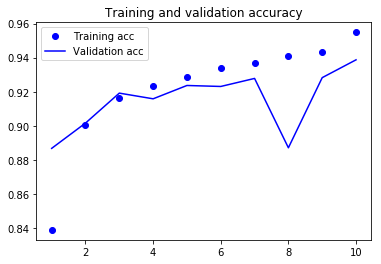

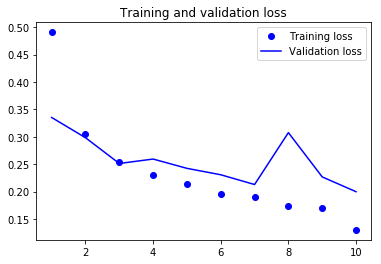

In [0]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Confution Matrix and Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

test_set_CM = train_datagen.flow_from_directory(
            data_directory,
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False,
            subset = 'validation')

Y_pred = model.predict_generator(test_set_CM, 8695/batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set_CM.classes, y_pred))
print('Classification Report')
target_names = ['black', 'blue', 'cyan', 'green', 'grey_light', 'grey_other', 'notACar', 'red', 'white', 'yellow']
print(classification_report(test_set_CM.classes, y_pred, target_names=target_names))

Found 8695 images belonging to 10 classes.
Confusion Matrix
[[2700   13    0    5    3   47    2    4    1    0]
 [  29  577    0    1    2    5    2    1    3    1]
 [   0    0   55    0    0    0    0    0    1    0]
 [   9    1    0  133    1    8    1    0    3    2]
 [   6    6    0    0  692   47    2    1   62    1]
 [  56   15    0    4   83  318    2    5    1    0]
 [   7    1    0    0    5    2  399    5    6    0]
 [   3    1    0    0    0    1    1 1227    0    5]
 [   5    2    0    1   50    5    1    4 1823    1]
 [   1    0    0    1    0    1    1    0    3  222]]
Classification Report
              precision    recall  f1-score   support

       black       0.96      0.97      0.97      2775
        blue       0.94      0.93      0.93       621
        cyan       1.00      0.98      0.99        56
       green       0.92      0.84      0.88       158
  grey_light       0.83      0.85      0.84       817
  grey_other       0.73      0.66      0.69       484
     not

Text(0.5, 41.09375, 'Predicted label')

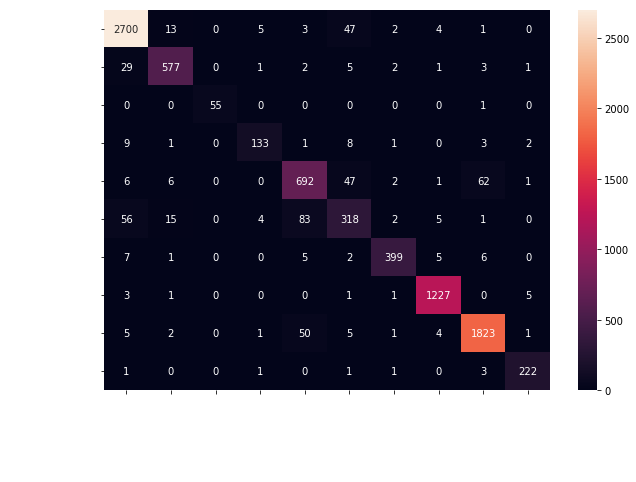

In [0]:
import seaborn as sns
cm = confusion_matrix(test_set_CM.classes, y_pred)

df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)

  
fig = plt.figure(figsize = (10,7))
    
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14, color="white")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14, color="white")
plt.ylabel('True label', color="white")
plt.xlabel('Predicted label', color="white")


Text(0.5, 41.09375, 'Predicted label')

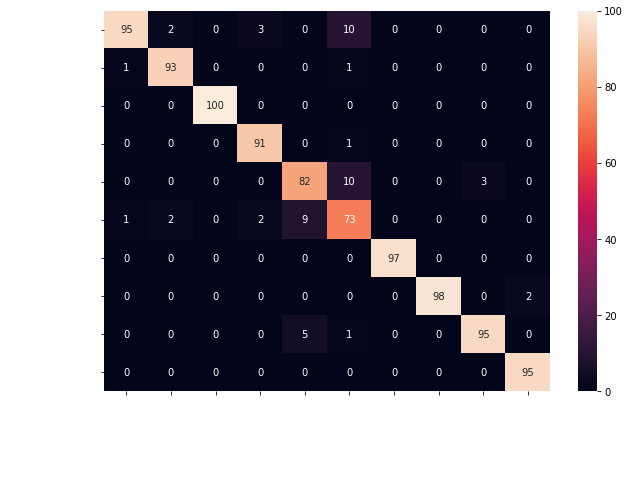

In [0]:
df_cm_percent = df_cm.copy()

for i in df_cm:
  for j in range(0, len(df_cm)):
    df_cm_percent[i][j] = df_cm[i][j] / df_cm[i].sum() * 100
  
fig = plt.figure(figsize = (10,7))
    
heatmap = sns.heatmap(df_cm_percent, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14, color="white")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14, color="white")
plt.ylabel('True label', color="white")
plt.xlabel('Predicted label', color="white")
